### Context
Product categorization also referred to as product classification, is a field of study within natural language processing (NLP). It is also one of the biggest challenges for e-commerce companies. With the advancement of AI technology, researchers have been applying machine learning to product categorization problems.

Product categorization is the placement and organization of products into their respective categories. In that sense, it sounds simple: choose the correct department for a product. However, this process is complicated by the sheer volume of products on many e-commerce platforms. Furthermore, many products could belong to multiple categories.
There are many reasons why product categorization is important for e-commerce and marketing. Through the accurate classification of your products, you can increase conversion rates, strengthen your search engine, and improve your site’s Google ranking.

A well-built product taxonomy allows customers to find what they are looking for quickly and easily. Making your site easy to navigate is one of the most important elements of your UX and will lead to higher conversion rates.

Correctly categorizing products allows your search engine to fetch products quicker. As a result, you create a quicker and more accurate search engine. Once you have a strong product taxonomy in place, this will allow you to create the relevant landing pages for your products. In turn, Google and other search engines will be able to index your site and your products more easily. In the end, this allows your products to rank higher on search engines, increasing the chance that customers find your site.

To help merchants choose the correct category, Amazon and other e-commerce companies have automated product categorization tools available. After simply inputting the title or a few words about the product, the system can automatically choose the correct category for you.

### Objective
Implement the techniques learned as a part of the course.

### Dataset
- The dataset has the following features:
- Data Set Characteristics: Multivariate
- Number of Instances: 50424
- Number of classes: 4

#### Import libraries

In [3]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set_theme()

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

[nltk_data] Downloading package stopwords to C:\Users\Sue
[nltk_data]     Hong\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\Sue
[nltk_data]     Hong\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to C:\Users\Sue
[nltk_data]     Hong\AppData\Roaming\nltk_data...


In [4]:
# Loading data into pandas dataframe
data = pd.read_csv("ecommerceDataset.csv")
data.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [6]:
data.shape

(50424, 2)

- There are 50,424 rows and 2 columns

#### Exploratory Data Analysis
     a. Print Shape of data.
     b. Print data description and info about the data. Comment about the result.
     c. Check the data type of the Text column’s first value.
     d. Check for null values and remove the rows in which null values are present.
     e. Check for unique labels in the ‘Label’ column.
     f. Save the unique labels in the list named ‘labels’.
     g. Print the first 5 rows of data.

In [7]:
#get the shape of data
data.shape

(50424, 2)

- The dataset has 50,424 enteries and 2 columns which are labels and text

In [8]:
#check first 10 data
data.head(10)

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...
5,Household,"SYGA Electric Knife Sharpener, Multi-Functiona..."
6,Household,Disha Napkin Dispenser - Chrome You are going ...
7,Electronics,Sony Alpha A6000L 24.3MP Digital SLR Camera (B...
8,Electronics,xcluma Antenna for GSM FCT Device GSM FCT Cabl...
9,Household,KitschKitsch Kids Plastic Portable Folding Tab...


Observations and data descriptions:

    - Label: categorization of the product into 4 labels;Household, Clothing&Accessories, Electronics,
             Books)
    - Text: description about the product that the customer bought

In [13]:
#check the data type
data.dtypes

Label    object
Text     object
dtype: object

- Both 'Label' and 'Text' are object

In [15]:
#check null values
data.isnull().sum(axis=0)

Label    0
Text     1
dtype: int64

- There's no missing value in 'Label' column
- Only one missing value in 'Text' column - remove the row that has missing value

In [17]:
#remove the row that has null value
df=data.dropna(how='any',axis=0)

In [18]:
#check unique values in 'Label' 
df['Label'].unique()

array(['Household', 'Clothing & Accessories', 'Electronics', 'Books'],
      dtype=object)

- The unique values in the 'Label' column are 'Household', 'Clothing & Accessories', 'Electronics', 'Books'

In [19]:
#Save the unique labels in the list named 'labels’.
labels=['Household', 'Clothing & Accessories', 'Electronics', 'Books']

In [20]:
#Print first 5 rows
df.head(5)

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


#### Plot the word cloud graph of the text column description for each product('Household', 'Clothing & Accessories', 'Electronics', 'Books')

In [30]:
from wordcloud import WordCloud, STOPWORDS

#word cloud graph for 'household'
HD = df[df["Label"] == "Household"]
description = " ".join(HD["Text"])

In [32]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", 
                      width=3000, height=2500).generate(description)

In [33]:
plt.figure(1, figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#word cloud graph for 'clothing&accessories'
CA = df[df["Label"] == "Clothing & Accessories"]
description2 = " ".join(CA["Text"])

In [ ]:
wordcloud2 = WordCloud(stopwords=STOPWORDS, background_color="black", 
                      width=3000, height=2500).generate(description2)

In [ ]:
plt.figure(1, figsize=(15, 15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
#word cloud graph for 'Electronics'
ES = df[df["Label"] == "Electronics"]
description3 = " ".join(CA["Text"])

In [ ]:
wordcloud3 = WordCloud(stopwords=STOPWORDS, background_color="black", 
                      width=3000, height=2500).generate(description3)

In [ ]:
plt.figure(1, figsize=(15, 15))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

In [ ]:
#word cloud graph for 'Books'
BS = df[df["Label"] == "Books"]
description4 = " ".join(BS["Text"])

In [ ]:
wordcloud4 = WordCloud(stopwords=STOPWORDS, background_color="black", 
                      width=3000, height=2500).generate(description4)

In [ ]:
plt.figure(1, figsize=(15, 15))
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

#### Text pre-processing
    a. Html tag removal.
    b. Tokenization.
    c. Remove the numbers.
    d. Removal of Special Characters and Punctuations.
    e. Removal of stopwords
    f. Conversion to lowercase.
    g. Lemmatize or stemming.
    h. Join the words in the list to convert back to text string in the data frame. (So that each row
       contains the data in text format.)
    i. Print the first 5 rows of data after pre-processing.

In [36]:
#remove html tag
def remove_html(Text):
    soup = BeautifulSoup(Text, "html.parser")
    return soup.get_text()

df['Text'] = df['Text'].apply(lambda x: remove_html(x))
df.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [37]:
# Tokenization of the dataset
df['Text'] = df.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1) 

In [59]:
#remove numbers
def remove_numbers(Text):
  Text = re.sub(r'\d+', '', Text)
  return Text

df['Text'] = df['Text'].apply(lambda x: remove_numbers(x))
df.head()

"def remove_numbers(Text):\n  Text = re.sub(r'\\d+', '', Text)\n  return Text\n\ndf['Text'] = df['Text'].apply(lambda x: remove_numbers(x))\ndf.head()"

In [54]:
#remove special characters(\) and punctuations
def replace_contractions(Text):
    #Replace contractions in string of text
    return contractions.fix(Text)

In [57]:
df['Text'] = df['Text'].apply(lambda x:replace_contractions(x))

In [60]:
#remove stopwords
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","aren't",'aren']


stopwords = list(set(stopwords) - set(customlist))                              

In [66]:
#convert to lowercase
def convert_lower(Text):
    Text = Text.lower()
    return Text

In [68]:
df["Text"] = df["Text"].apply(lambda x: convert_lower(x))

In [73]:
#Lemmatize/stemming
lemmatizer = WordNetLemmatizer()

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = lemmatize_list(words)
    return ' '.join(words)

In [74]:
df['Text'] = df.apply(lambda row: normalize(row['Text']), axis=1)

In [75]:
df.head(5)

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch ( White ) - P...
3,Clothing & Accessories,"Proline Men 's Track Jacket Proline Woven , 10..."
4,Household,Chef 's Garage 2 Slot Edge Grip Kitchen Knife ...


#### Vectorization
       a. Use CountVectorizer.
       b. Use TfidfVectorizer.

#### a. CountVectorizer

In [76]:
##convert text data to numbers by using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=5000) #Keep max to 5000 features
data_features = Count_vec.fit_transform(df['Text'])

# Convert the data features to array.
data_features = data_features.toarray()                        

In [77]:
data_features.shape

(50423, 5000)

- Now the features increased to 5,000 from 2 

In [80]:
X = data_features
y = df.Label

In [81]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
# build RF model for the classification of 'text'.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)

print(forest)

# calculate the cross validation score.
print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.9689428039054532


In [83]:
# Find optimal number of base learners using k-fold CV
base = [x for x in range(1, 25)]
base

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [84]:
from sklearn.model_selection import KFold, StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score,classification_report

import seaborn as sns

In [86]:
# K-Fold Cross validation .
cv_scores = []
for b in base:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

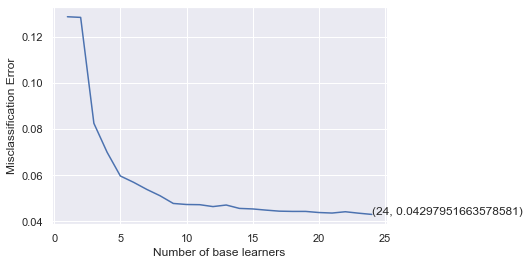

In [87]:
# plotting the error as k increases
#error corresponds to each nu of estimator
error = [1 - x for x in cv_scores]      

#Selection of optimal nu of n_estimator corresponds to minimum error.
optimal_learners = base[error.index(min(error))]   

#Plot between each nu of estimator and misclassification error
plt.plot(base, error)                                  

xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

- The misclassification error went down to almost 0.04%

In [89]:
# Training the model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators=optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(
    classification_report(
        y_test, count_vectorizer_predicted, target_names=["Household", "Clothing & Accessories", "Electronics","Books"]
    )
)
print("Accuracy of the model is : ", accuracy_score(y_test, count_vectorizer_predicted))

                        precision    recall  f1-score   support

             Household       0.97      0.97      0.97      3590
Clothing & Accessories       0.97      0.98      0.97      2596
           Electronics       0.97      0.94      0.96      3167
                 Books       0.95      0.97      0.96      5774

              accuracy                           0.97     15127
             macro avg       0.97      0.97      0.97     15127
          weighted avg       0.97      0.97      0.97     15127

Accuracy of the model is :  0.966615984663185


[[3473   12   17   88]
 [  13 2533    9   41]
 [  31    9 2990  137]
 [  50   46   52 5626]]


<AxesSubplot:>

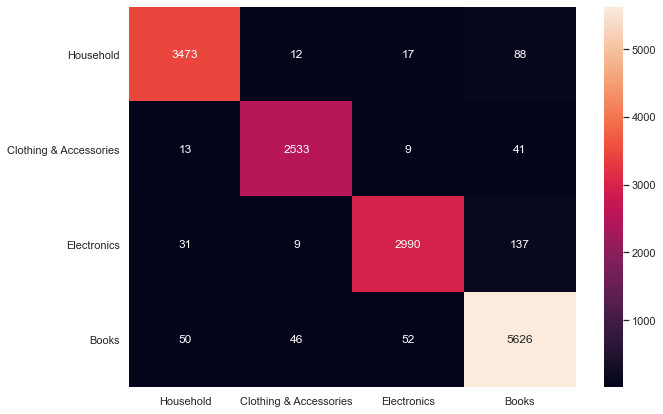

In [91]:
from sklearn.metrics import confusion_matrix

#evaluate the model using confusion matrix
conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(
    conf_mat, index=[i for i in ["Household", "Clothing & Accessories", "Electronics","Books"]], 
    columns=[i for i in ["Household", "Clothing & Accessories", "Electronics","Books"]]
)
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="g")

#### Print the top 40 features and plot their word cloud - countvectorizer

In [1]:
#top 40 features and plot for countvectorizer

all_features = (
    Count_vec.get_feature_names()
)  # Instantiate the feature from the vectorizer
top_features = (
    ""  # Top 40 feature into top_feature after training the model
)
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features += all_features[i]
    top_features += ","

print(top_features)

print(" ")
print(" ")

from wordcloud import WordCloud

wordcloud = WordCloud(
    background_color="white", colormap="viridis", width=2000, height=1000
).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.figure(1, figsize=(25, 25), frameon="equal")
plt.title("Top 40 features WordCloud", fontsize=20)
plt.axis("off")
plt.show()

#### b.TF-IDF
TF * IDF which is equal to (W/Wr)*LOG(N/n)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Using TfidfVectorizer to convert text data to numbers
tfidf_vect = TfidfVectorizer(max_features=5000)
data_features = tfidf_vect.fit_transform(df['Text'])

data_features = data_features.toarray()

data_features.shape

In [ ]:
X = data_features
y = df.Label

In [ ]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# build RF model for the classification of 'text'.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)

print(forest)

# calculate the cross validation score.
print(np.mean(cross_val_score(forest, X, y, cv=10)))

In [ ]:
# Find optimal number of base learners using k-fold CV
base_ln = [x for x in range(1, 25)]
base_ln

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [ ]:
# plotting the error as k increases
#error corresponds to each nu of estimator
error = [1 - x for x in cv_scores]       

#Selection of optimal nu of n_estimator corresponds to minimum error.
optimal_learners = base_ln[error.index(min(error))]              

#Plot between each nu of estimator and misclassification error
plt.plot(base_ln, error)                                         

xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
result = forest.predict(X_test)

In [ ]:
conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ["Household", "Clothing & Accessories", "Electronics","Books"]],
                  columns = [i for i in ["Household", "Clothing & Accessories", "Electronics","Books"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Print the top 40 features and plot their word cloud - TF-IDF

In [ ]:
#Instantiate the feature by using TF-IDF
all_features = tfidf_vect.get_feature_names()

# Top 40 feature into top_feature after training the model
top_features=''                                            
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

#### Summarize the application of Various Pre-processing and Vectorization and the performance of your model on this dataset.

#### Summary:
- Used dataset which has production classification in text format and their descriptions about the product.
- Built a model for text-classification by plotting the word cloud of production description.

- Plotted the percentage of public reviews about 4 products.
- Plotted the distribution of productions from all the texts
- Plotted the distribution of customers review for each productions.
- Plotted the distribution of all the description text of products that customers' bought


- The pre-precessed data is converted(vectorized) to numbers with CountVectorizer and TF-IDF.
- After building the classification model, predicted the result for the test data.
- Trained the model and optimize the parameter that led to significant increase in the overall accuracy.After using the above techniques, model performed good in perspective of how the text classification models perform.
- Able to increase the max_feature parameter in the vectorizer also able to apply other model and hyperparameter tuning to increase the overall accuracy.
- One more way to increase accuracy is to use different variations of Pre-processing techniques.